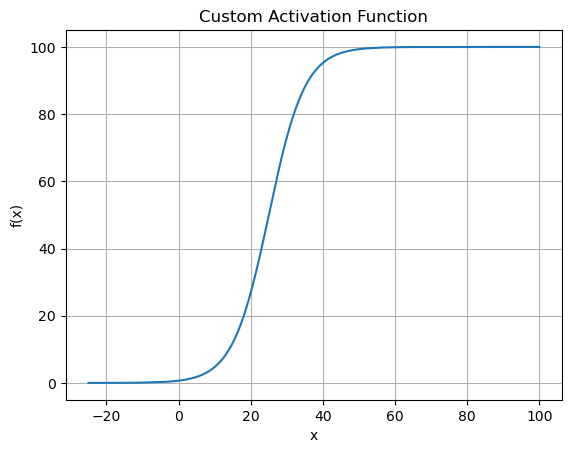

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def custom_activation(x):
    k = 0.2
    b = 25
    return np.round(100 / (1 + np.exp(-k * (x - b))), 2)

x_values = np.linspace(-25, 100, 400)
y_values = custom_activation(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Custom Activation Function')
plt.grid(True)
plt.show()